# Analysis of NFL play choice

## import desired packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## read in data and take a look at the dataset

In [3]:
df = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")

C:\Users\pspat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

## filter to non-special teams related plays or timeouts

In [5]:
df=df.loc[(df['play_type'] == 'pass')|(df['play_type'] == 'run')]

In [6]:
df=df.loc[df["two_point_attempt"] == 0] 

In [7]:
df=df.loc[df["timeout"] == 0] 

In [8]:
df=df.loc[df["extra_point_attempt"] == 0] 

In [9]:
df=df.loc[df["ydstogo"] > 0] 

In [10]:
df=df.loc[df["penalty"] == 0] 

## Begin dropping columns that are not relevant to analysis

In [11]:
cols = df.columns.tolist()
cols

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [12]:
df.drop(columns = [ 'extra_point_attempt',
 'two_point_attempt',
 'field_goal_attempt',
 'kickoff_attempt',
 'punt_attempt',
 'fumble',
 'complete_pass',
 'assist_tackle',
 'lateral_reception',
 'lateral_rush',
 'lateral_return',
 'lateral_recovery',
 'passer_player_id',
 'passer_player_name',
 'receiver_player_id',
 'receiver_player_name',
 'rusher_player_id',
 'rusher_player_name',
 'lateral_receiver_player_id',
 'lateral_receiver_player_name',
 'lateral_rusher_player_id',
 'lateral_rusher_player_name',
 'lateral_sack_player_id',
 'lateral_sack_player_name',
 'interception_player_id',
 'interception_player_name',
 'lateral_interception_player_id',
 'lateral_interception_player_name',
 'punt_returner_player_id',
 'punt_returner_player_name',
 'lateral_punt_returner_player_id',
 'lateral_punt_returner_player_name',
 'kickoff_returner_player_name',
 'kickoff_returner_player_id',
 'lateral_kickoff_returner_player_id',
 'lateral_kickoff_returner_player_name',
 'punter_player_id',
 'punter_player_name',
 'kicker_player_name',
 'kicker_player_id',
 'own_kickoff_recovery_player_id',
 'own_kickoff_recovery_player_name',
 'blocked_player_id',
 'blocked_player_name',
 'tackle_for_loss_1_player_id',
 'tackle_for_loss_1_player_name',
 'tackle_for_loss_2_player_id',
 'tackle_for_loss_2_player_name',
 'qb_hit_1_player_id',
 'qb_hit_1_player_name',
 'qb_hit_2_player_id',
 'qb_hit_2_player_name',
 'forced_fumble_player_1_team',
 'forced_fumble_player_1_player_id',
 'forced_fumble_player_1_player_name',
 'forced_fumble_player_2_team',
 'forced_fumble_player_2_player_id',
 'forced_fumble_player_2_player_name',
 'solo_tackle_1_team',
 'solo_tackle_2_team',
 'solo_tackle_1_player_id',
 'solo_tackle_2_player_id',
 'solo_tackle_1_player_name',
 'solo_tackle_2_player_name',
 'assist_tackle_1_player_id',
 'assist_tackle_1_player_name',
 'assist_tackle_1_team',
 'assist_tackle_2_player_id',
 'assist_tackle_2_player_name',
 'assist_tackle_2_team',
 'assist_tackle_3_player_id',
 'assist_tackle_3_player_name',
 'assist_tackle_3_team',
 'assist_tackle_4_player_id',
 'assist_tackle_4_player_name',
 'assist_tackle_4_team',
 'pass_defense_1_player_id',
 'pass_defense_1_player_name',
 'pass_defense_2_player_id',
 'pass_defense_2_player_name',
 'fumbled_1_team',
 'fumbled_1_player_id',
 'fumbled_1_player_name',
 'fumbled_2_player_id',
 'fumbled_2_player_name',
 'fumbled_2_team',
 'fumble_recovery_1_team',
 'fumble_recovery_1_yards',
 'fumble_recovery_1_player_id',
 'fumble_recovery_1_player_name',
 'fumble_recovery_2_team',
 'fumble_recovery_2_yards',
 'fumble_recovery_2_player_id',
 'fumble_recovery_2_player_name',
 'return_team',
 'return_yards',
 'penalty_team',
 'penalty_player_id',
 'penalty_player_name',
 'penalty_yards',
 'replay_or_challenge',
 'replay_or_challenge_result',
 'penalty_type',
 'defensive_two_point_attempt',
 'defensive_two_point_conv',
 'defensive_extra_point_attempt',
 'defensive_extra_point_conv'], inplace = True)

In [13]:
df.drop(columns = ['timeout', 'timeout_team','td_team','field_goal_result','kick_distance','extra_point_result','two_point_conv_result'], inplace = True)

## Understand missing value distribution and address

In [14]:
df.isna().sum()

play_id                            0
game_id                            0
home_team                          0
away_team                          0
posteam                            0
posteam_type                       0
defteam                            0
side_of_field                      0
yardline_100                       0
game_date                          0
quarter_seconds_remaining          0
half_seconds_remaining            17
game_seconds_remaining            14
game_half                          0
quarter_end                        0
drive                              0
sp                                 0
qtr                                0
down                               0
goal_to_go                         0
time                               0
yrdln                              0
ydstogo                            0
ydsnet                             0
desc                               0
play_type                          0
yards_gained                     207
s

## Subset the dataframe to columns of interest for current analysis

In [15]:
df_play_choice = df[['game_date','yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','ydsnet','play_type','yards_gained','posteam','shotgun','score_differential']]

check and treat missing values

In [16]:
df_play_choice.isna().sum()

game_date                   0
yardline_100                0
half_seconds_remaining     17
game_seconds_remaining     14
down                        0
ydstogo                     0
ydsnet                      0
play_type                   0
yards_gained              207
posteam                     0
shotgun                     0
score_differential          0
dtype: int64

In [17]:
df_play_choice.dropna(inplace=True)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_play_choice['down']=df_play_choice['down'].astype(int)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Play choice overall comparison

Text(0.5, 1.0, 'Overall Play Choice Selection 09-18 NFL')

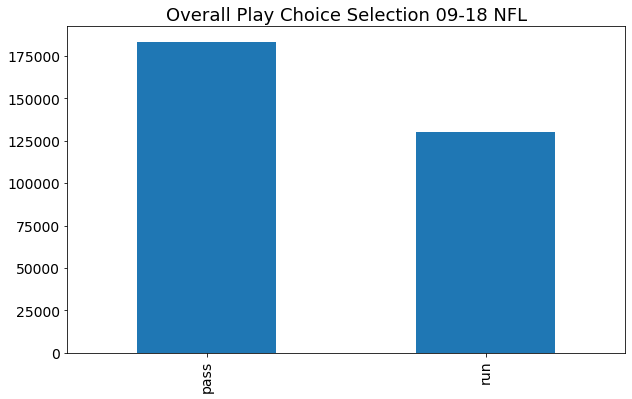

In [19]:
fig1=df_play_choice['play_type'].value_counts().plot(kind='bar', figsize = (10,6), fontsize=14)
plt.title('Overall Play Choice Selection 09-18 NFL', fontsize = 18)

Play selection by down

Text(0.5, 1.0, 'Play Selection by Down 09-18 NFL')

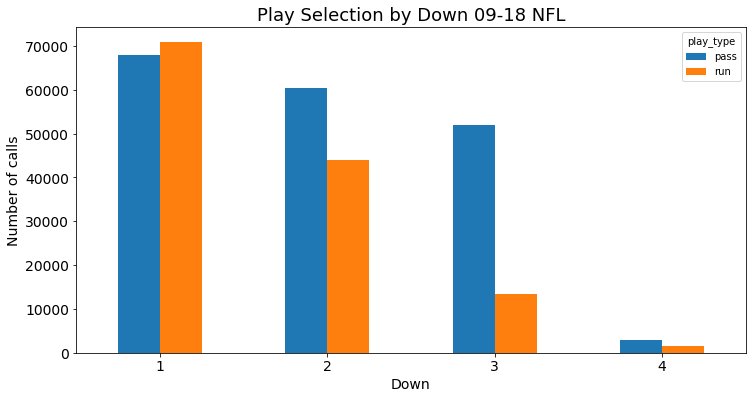

In [73]:
df_play_choice.groupby('down')['play_type'].value_counts().unstack(level=-1).plot(kind='bar',figsize=(12,6), fontsize= 14, rot = 0)
plt.xlabel('Down', fontsize=14)
plt.ylabel('Number of calls',fontsize = 14)
plt.title('Play Selection by Down 09-18 NFL', fontsize = 18)

Text(0.5, 1.0, 'Play Selection by Down 09-18 NFL')

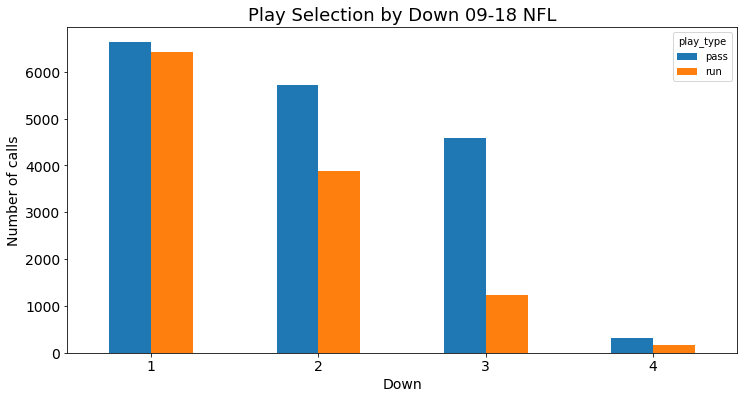

In [78]:
df_plays_18.groupby('down')['play_type'].value_counts().unstack(level=-1).plot(kind='bar',figsize=(12,6), fontsize= 14, rot = 0)
plt.xlabel('Down', fontsize=14)
plt.ylabel('Number of calls',fontsize = 14)
plt.title('Play Selection by Down 09-18 NFL', fontsize = 18)

## create groupings for yards to go

In [21]:
def ydstogo_grouping(row):
    if row['ydstogo'] in range(7,11):
        val = 3
    elif row['ydstogo'] in range(4,7):
        val = 2
    elif row['ydstogo'] in range(1,4):
        val = 1
    elif (row['ydstogo'] > 10) & (row['ydstogo'] < 20):
        val = 4 
    else:
        val = 5
    
    return val

In [22]:
df_play_choice['yds_to_go_grp'] = df_play_choice.apply(ydstogo_grouping, axis=1)
df_play_choice.loc[df_play_choice['posteam']=='JAC','posteam']='JAX'
df_play_choice.loc[df_play_choice['posteam']=='STL','posteam']='LAR'
df_play_choice.loc[df_play_choice['posteam']=='LA','posteam']='LAR'
df_play_choice.loc[df_play_choice['posteam']=='SD','posteam']='LAC'

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pspat\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
df_play_choice.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,yds_to_go_grp
1,2009-09-10,58.0,1793.0,3593.0,1,10,5,pass,5.0,PIT,0,0.0,3
2,2009-09-10,53.0,1756.0,3556.0,2,5,2,run,-3.0,PIT,0,0.0,2
3,2009-09-10,56.0,1715.0,3515.0,3,8,2,pass,0.0,PIT,1,0.0,3
5,2009-09-10,98.0,1696.0,3496.0,1,10,0,run,0.0,TEN,0,0.0,3
6,2009-09-10,98.0,1660.0,3460.0,2,10,4,pass,4.0,TEN,0,0.0,3


Text(0.4, 0.35, 'Example for x-axis (2,3) represents 2nd down and yrd group 3,\n meaning 7-10 yards to go')

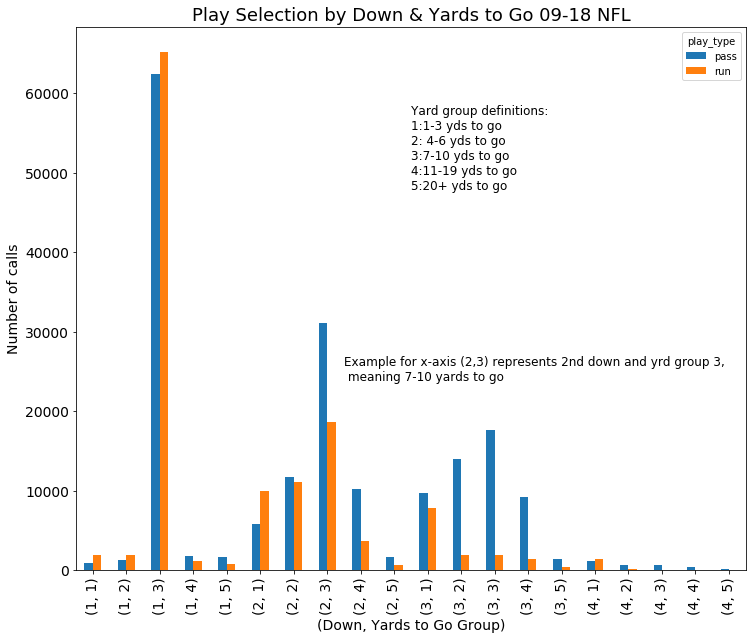

In [24]:
ax = df_play_choice.groupby(['down','yds_to_go_grp'])['play_type'].value_counts().unstack(level=-1).plot(kind='bar',figsize=(12,10),fontsize= 14, rot = 90)
plt.xlabel('(Down, Yards to Go Group)', fontsize=14)
plt.ylabel('Number of calls', fontsize = 14)
plt.title('Play Selection by Down & Yards to Go 09-18 NFL', fontsize = 18)
plt.text(0.5,0.7,'Yard group definitions: \n1:1-3 yds to go\n2: 4-6 yds to go\n3:7-10 yds to go\n4:11-19 yds to go\n5:20+ yds to go',size = 12,transform=ax.transAxes)
plt.text(0.4,0.35,'Example for x-axis (2,3) represents 2nd down and yrd group 3,\n meaning 7-10 yards to go',size = 12,transform=ax.transAxes)

## explore ratio of pass to run plays for each team

In [25]:
df_team=df_play_choice.groupby(['posteam'])['play_type'].value_counts()

In [26]:
df_team = df_team.unstack(level=-1)

In [27]:
df_team['pass_ratio'] = df_team['pass']/(df_team['pass']+df_team['run'])

In [28]:
df_team.sort_values(by='pass_ratio',ascending=False)

play_type,pass,run,pass_ratio
posteam,,,
DET,6456,3696,0.635934
ARI,6012,3645,0.622554
IND,6163,3809,0.618030
NO,6357,3930,0.617964
ATL,6106,3862,0.612560
GB,5941,3896,0.603944
NYG,5858,3864,0.602551
PIT,5875,3881,0.602194
TB,5711,3861,0.596636


## average yards gained by play type

In [29]:
df_play_choice.groupby('play_type').mean()['yards_gained']

play_type
pass    6.269083
run     4.336421
Name: yards_gained, dtype: float64

In [30]:
#create a first down flag column
df_play_choice['yrd_diff'] = df_play_choice['ydstogo']-df_play_choice['yards_gained']
df_play_choice['first_down_flag'] = df_play_choice['yrd_diff'].apply(lambda x: 0 if x > 0 else 1)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## average yards gained by play type for a 'passing down"

In [31]:
test = df_play_choice.loc[(df_play_choice['down']==3)&(df_play_choice['yds_to_go_grp']==2)]

In [32]:
test.groupby('play_type').mean()['yards_gained']

play_type
pass    5.466348
run     5.435501
Name: yards_gained, dtype: float64

In [33]:
test.groupby('play_type').mean()['first_down_flag']

play_type
pass    0.434336
run     0.439628
Name: first_down_flag, dtype: float64

interesting that running on a passing down (3 & four-six yards to go) results in slightly more first downs than passing.  Of course the number of pass calls heavily outweighs runs (unequal sample sizes)

# Create a measure of uniqueness for a play call via KNN approach

In [34]:
df_15_17 = df_play_choice[df_play_choice['game_date'].str.contains('2015|2016|2017')]

In [35]:
df_18 = df_play_choice[df_play_choice['game_date'].str.contains('2018')]

In [36]:
df_18.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,yds_to_go_grp,yrd_diff,first_down_flag
407337,2018-09-06,80.0,1800.0,3600.0,1,15,73,pass,10.0,ATL,0,0.0,4,5.0,0
407338,2018-09-06,70.0,1762.0,3562.0,2,5,73,run,11.0,ATL,0,0.0,2,-6.0,1
407339,2018-09-06,59.0,1726.0,3526.0,1,10,73,run,20.0,ATL,0,0.0,3,-10.0,1
407340,2018-09-06,39.0,1690.0,3490.0,1,10,73,pass,0.0,ATL,0,0.0,3,10.0,0
407341,2018-09-06,39.0,1685.0,3485.0,2,10,73,pass,0.0,ATL,1,0.0,3,10.0,0


In [37]:
X = df_15_17[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','play_type','score_differential']]

In [38]:
X['play_type_enconded'] = X['play_type'].apply(lambda x: 0 if x == 'run' else 1)

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
columns_to_scale  = ['yardline_100', 'half_seconds_remaining','game_seconds_remaining','ydstogo','score_differential']
encoded_cols = ['down','play_type_enconded']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(X[columns_to_scale]) 
encoded_columns = X[encoded_cols]

X_use = pd.DataFrame(np.concatenate([scaled_columns, encoded_columns], axis=1), columns =['yardline_100', 'half_seconds_remaining','game_seconds_remaining','ydstogo','score_differential','down','play_type'])

In [40]:
X_use.head()

,yardline_100,half_seconds_remaining,game_seconds_remaining,ydstogo,score_differential,down,play_type
0,1.119105,1.756055,1.772528,0.335911,0.146738,1.0,0.0
1,0.382958,1.684111,1.735332,0.335911,0.146738,1.0,1.0
2,0.014885,1.652751,1.719118,-1.933027,0.146738,2.0,0.0
3,-0.148703,1.582651,1.682876,0.335911,0.146738,1.0,1.0
4,-0.721262,1.501484,1.640911,0.335911,0.146738,1.0,0.0


In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
nbrs = NearestNeighbors(n_neighbors=5)

In [43]:
nbrs.fit(X_use)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [45]:
X_18 = df_18[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','play_type','score_differential']]
X_18['play_type_encoded'] = X_18['play_type'].apply(lambda x: 0 if x == 'run' else 1)
columns_to_scale  = ['yardline_100', 'half_seconds_remaining','game_seconds_remaining','ydstogo','score_differential']
encoded_cols = ['down','play_type_encoded']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_columns  = scaler.fit_transform(X_18[columns_to_scale]) 
encoded_columns = X_18[encoded_cols]

X_18_use = pd.DataFrame(np.concatenate([scaled_columns, encoded_columns], axis=1), columns =['yardline_100', 'half_seconds_remaining','game_seconds_remaining','ydstogo','score_differential','down','play_type'])

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
distances, indices = nbrs.kneighbors(X_18_use)

In [47]:
mean_dist_nbrs = np.mean(distances,axis =1)

In [48]:
df_18['mean_dist_nbrs'] = mean_dist_nbrs

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_18.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,yds_to_go_grp,yrd_diff,first_down_flag,mean_dist_nbrs
407337,2018-09-06,80.0,1800.0,3600.0,1,15,73,pass,10.0,ATL,0,0.0,4,5.0,0,0.123975
407338,2018-09-06,70.0,1762.0,3562.0,2,5,73,run,11.0,ATL,0,0.0,2,-6.0,1,0.042499
407339,2018-09-06,59.0,1726.0,3526.0,1,10,73,run,20.0,ATL,0,0.0,3,-10.0,1,0.024415
407340,2018-09-06,39.0,1690.0,3490.0,1,10,73,pass,0.0,ATL,0,0.0,3,10.0,0,0.046859
407341,2018-09-06,39.0,1685.0,3485.0,2,10,73,pass,0.0,ATL,1,0.0,3,10.0,0,0.073398


In [50]:
a = df_18.groupby('posteam').mean()['mean_dist_nbrs']
a.sort_values(ascending = False)

posteam
BUF    0.327350
ARI    0.279411
WAS    0.274176
CIN    0.269365
NYJ    0.268590
TB     0.266512
CHI    0.263042
TEN    0.261147
DET    0.261083
BAL    0.259257
NO     0.258585
JAX    0.257180
NYG    0.256384
PHI    0.256293
KC     0.255615
LAC    0.254780
GB     0.251945
MIA    0.251757
CLE    0.250870
SF     0.250402
DEN    0.249382
NE     0.248572
SEA    0.248541
LAR    0.246030
HOU    0.245100
MIN    0.243358
ATL    0.243278
CAR    0.240828
PIT    0.240686
DAL    0.240679
OAK    0.239393
IND    0.237567
Name: mean_dist_nbrs, dtype: float64

low variance here partially due to the fact that each teams play call is within the dataset so its likely that the nearest neighbors to given play call is another play call by teh same team in a similar field situation

## Predicting play calls

In [86]:
df_play_choice['play_type_encoded'] = df_play_choice['play_type'].apply(lambda x: 0 if x == 'run' else 1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_play_choice['posteam_encoded'] = le.fit_transform(df_play_choice['posteam'])

df_plays_15_17 = df_play_choice[df_play_choice['game_date'].str.contains('2015|2016|2017')]
df_plays_18 = df_play_choice[df_play_choice['game_date'].str.contains('2018')]

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [87]:
X_train = df_plays_15_17[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','score_differential','posteam_encoded']]
y_train = df_plays_15_17['play_type_encoded']

In [88]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
X_test  = df_plays_18[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','score_differential','posteam_encoded']]
y_actual = df_plays_18['play_type_encoded']
y_pred = xgb_classifier.predict(X_test)

print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62     11710
           1       0.74      0.73      0.74     17237

    accuracy                           0.69     28947
   macro avg       0.68      0.68      0.68     28947
weighted avg       0.69      0.69      0.69     28947



randomized grid search for optimizing parameters

In [ ]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import KFold

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(100, 1000),
              'learning_rate': stats.uniform(0.01, 1.0),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = KFold(n_splits= numFolds, shuffle = True)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 15, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'f1', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

clf.fit(X_train, y_train)

In [ ]:
clf.best_estimator_

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_actual,y_pred))

## Predicting the play selection of a given team

In [58]:
df_chi = df_play_choice[df_play_choice['posteam']=='CHI']

In [59]:
df_chi.head()

,game_date,yardline_100,half_seconds_remaining,game_seconds_remaining,down,ydstogo,ydsnet,play_type,yards_gained,posteam,shotgun,score_differential,yds_to_go_grp,yrd_diff,first_down_flag,play_type_encoded,posteam_encoded
2228,2009-09-13,61.0,1599.0,3399.0,1,10,0,pass,0.0,CHI,0,0.0,3,10.0,0,1,5
2229,2009-09-13,61.0,1597.0,3397.0,2,10,2,run,2.0,CHI,0,0.0,3,8.0,0,0,5
2230,2009-09-13,59.0,1557.0,3357.0,3,8,2,pass,0.0,CHI,1,0.0,3,8.0,0,1,5
2240,2009-09-13,82.0,1333.0,3133.0,1,10,20,pass,20.0,CHI,0,0.0,3,-10.0,1,1,5
2241,2009-09-13,62.0,1319.0,3119.0,1,10,23,run,3.0,CHI,0,0.0,3,7.0,0,0,5


In [79]:
df_chi_15_17 = df_chi[df_chi['game_date'].str.contains('2015|2016|2017')]
df_chi_18 = df_chi[df_chi['game_date'].str.contains('2018')]

In [80]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1,max_depth =3)

In [63]:
X_train = df_chi_15_17[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','score_differential']]
y_train = df_chi_15_17['play_type_encoded']

In [64]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
X_test  = df_chi_18[['yardline_100', 'half_seconds_remaining','game_seconds_remaining','down','ydstogo','score_differential']]
y_actual = df_chi_18['play_type_encoded']

y_pred = xgb_classifier.predict(X_test)

In [66]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.79      0.65       398
           1       0.75      0.49      0.59       504

    accuracy                           0.62       902
   macro avg       0.65      0.64      0.62       902
weighted avg       0.66      0.62      0.62       902



## Analysis of play selection through time

In [67]:
df_play_choice['year'] = df_play_choice['game_date'].apply(lambda x:x[:4])

C:\Users\pspat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
time_df = df_play_choice.groupby(['year','play_type_encoded']).count()['down']

In [69]:
time_df = time_df.unstack(level=-1)

In [70]:
time_df['pass_ratio']= time_df[1]/(time_df[1]+time_df[0])
time_df['run_ratio']= time_df[0]/(time_df[1]+time_df[0])

In [71]:
df_yearly_scoring = pd.read_csv('yearly_scoring_nfl.csv')
df_yearly_scoring.drop(index = 0, inplace = True)
df_yearly_scoring.set_index('Year', inplace=True)
df_yearly_scoring.sort_index(inplace=True)
scoring_series = df_yearly_scoring['Avg Pts per Team']
scoring_series = list(scoring_series)
time_df['avg_pts_per_team'] = scoring_series
# time_df = pd.merge(time_df, df_yearly_scoring, how = 'left',left_on = 'year',right_on = 'Year')

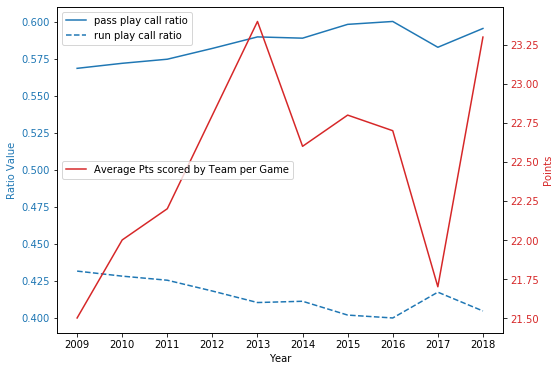

In [72]:

fig, ax1 = plt.subplots(figsize=(8, 6))
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Ratio Value', color=color)
ax1.plot(time_df.index,time_df['pass_ratio'],color = color, label= 'pass play call ratio')
ax1.plot(time_df.index,time_df['run_ratio'], color = color, linestyle = 'dashed', label='run play call ratio')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Points', color=color)
ax2.plot(time_df.index,time_df['avg_pts_per_team'], color=color,label= 'Average Pts scored by Team per Game')
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='best')
ax2.legend(loc='center left')

idea is to pull description of direction of run and pass to see what teams spread the ball the most and see if its correlated to winning percentage